In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
saham_trend = {
    'BUMI': 'Bumi Resources',
    'RLCO': 'Reliance Coal',
    'ADRO': 'Adaro Energy',
    'TINS': 'Timah',
    'MEDC': 'Medco Energi',
    'DKFT': 'Doku.Tech',
    'WTON': 'Weton Technology',
    'TOWR': 'Sarana Menara Nusantara'
}

list_saham = [f'{ticker}.JK' for ticker in saham_trend.keys()]
print("Saham trend yg dianalisis:")
for ticker, nama in saham_trend.items():
    print(f"  {ticker} - {nama}")

Saham trend yg dianalisis:
  BUMI - Bumi Resources
  RLCO - Reliance Coal
  ADRO - Adaro Energy
  TINS - Timah
  MEDC - Medco Energi
  DKFT - Doku.Tech
  WTON - Weton Technology
  TOWR - Sarana Menara Nusantara


In [3]:
akhir = datetime.now()
mulai = akhir - timedelta(days=365)

print(f"\nDownload data dari {mulai.date()} s/d {akhir.date()}...")
df = yf.download(list_saham, start=mulai, end=akhir, progress=False)

print(f"Shape: {df['Close'].shape}")
print(f"\nData terakhir:")
print(df['Close'].tail())


Download data dari 2025-01-28 s/d 2026-01-28...


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11480\1221301005.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(list_saham, start=mulai, end=akhir, progress=False)


Shape: (237, 8)

Data terakhir:
Ticker      ADRO.JK  BUMI.JK  DKFT.JK  MEDC.JK  RLCO.JK  TINS.JK  TOWR.JK  \
Date                                                                        
2026-01-22   2350.0    348.0    895.0   1520.0      NaN   3610.0    620.0   
2026-01-23   2400.0    360.0    925.0   1515.0      NaN   3650.0    625.0   
2026-01-26   2390.0    332.0    910.0   1575.0      NaN   3760.0    625.0   
2026-01-27   2290.0    344.0    915.0   1530.0      NaN   3750.0    600.0   
2026-01-28   2210.0    294.0    840.0   1515.0      NaN   3340.0    555.0   

Ticker      WTON.JK  
Date                 
2026-01-22    103.0  
2026-01-23    102.0  
2026-01-26    102.0  
2026-01-27    101.0  
2026-01-28     95.0  


In [4]:
print("\nPerforma 1 tahun:")
print("="*60)

perf = pd.DataFrame()
for ticker in list_saham:
    sym = ticker.replace('.JK', '')
    harga = df['Close'][ticker]
    
    ret = ((harga.iloc[-1] - harga.iloc[0]) / harga.iloc[0]) * 100
    vol = harga.pct_change().std() * np.sqrt(252) * 100
    
    min_h = harga.min()
    max_h = harga.max()
    now_h = harga.iloc[-1]
    
    perf = pd.concat([perf, pd.DataFrame({
        'Saham': [sym],
        'Harga': [f'{now_h:.0f}'],
        'Return': [f'{ret:.1f}%'],
        'Volatilitas': [f'{vol:.1f}%'],
        'Min': [f'{min_h:.0f}'],
        'Max': [f'{max_h:.0f}']
    })], ignore_index=True)

print(perf.to_string(index=False))


Performa 1 tahun:
Saham Harga Return Volatilitas  Min  Max
 BUMI   294 149.2%       79.3%   77  464
 RLCO   nan   nan%      165.1%  226 8700
 ADRO  2210  12.7%       44.1% 1403 2400
 TINS  3340 249.2%       71.7%  792 3940
 MEDC  1515  50.2%       40.7%  898 1575
 DKFT   840 270.0%       77.3%  179  990
 WTON    95  27.8%       62.4%   58  112
 TOWR   555 -14.7%       46.6%  447  677


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11480\2670659635.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  vol = harga.pct_change().std() * np.sqrt(252) * 100


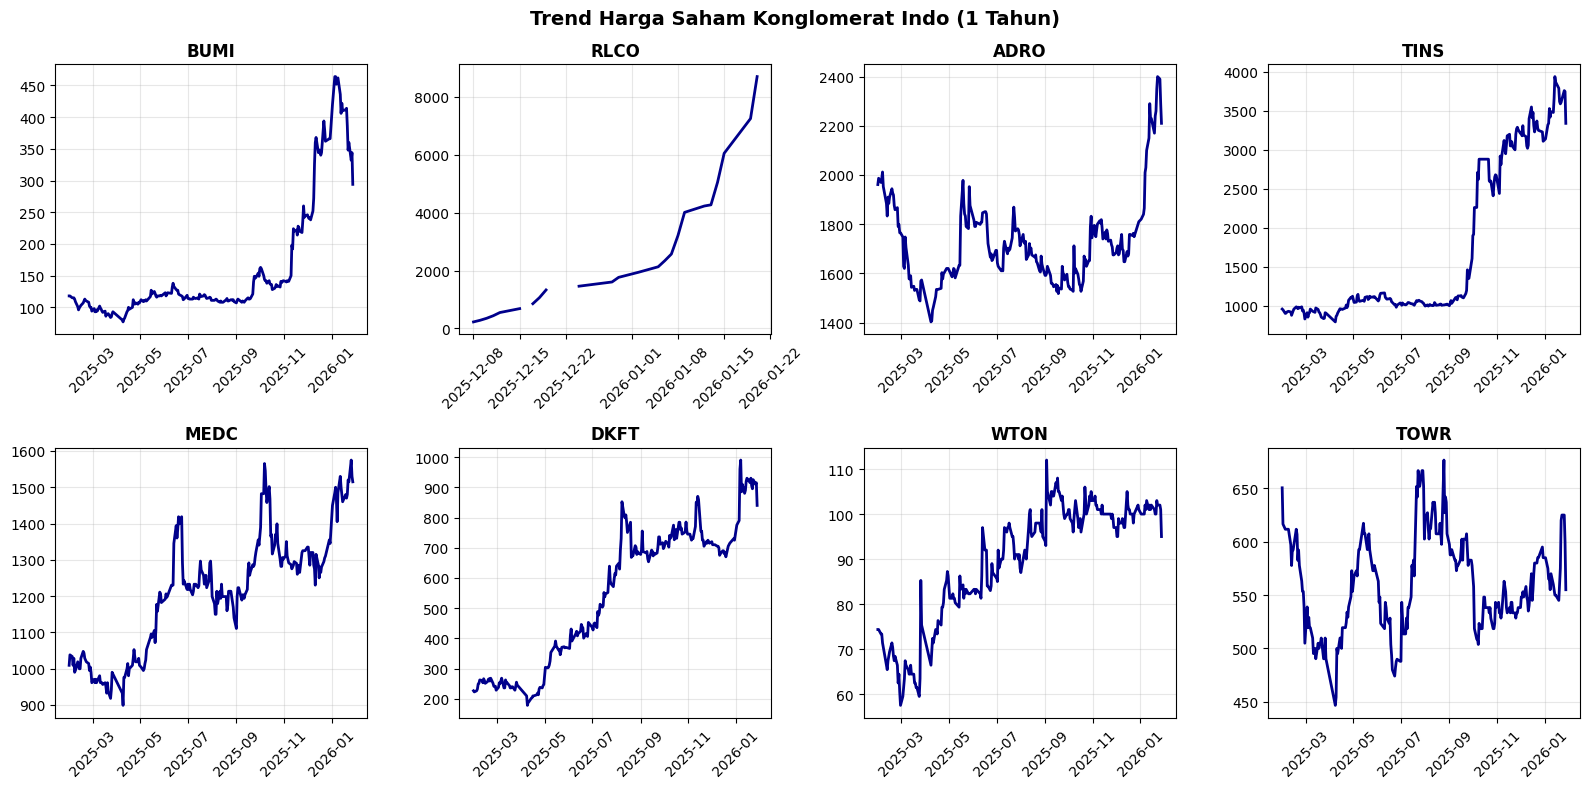

Grafik performa saham trend


In [5]:
fig, ax = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Trend Harga Saham Konglomerat Indo (1 Tahun)', fontsize=14, fontweight='bold')

for idx, ticker in enumerate(list_saham):
    i = idx // 4
    j = idx % 4
    
    sym = ticker.replace('.JK', '')
    harga = df['Close'][ticker]
    
    ax[i, j].plot(harga.index, harga.values, linewidth=2, color='darkblue')
    ax[i, j].set_title(sym, fontweight='bold')
    ax[i, j].grid(alpha=0.3)
    ax[i, j].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
print("Grafik performa saham trend")

In [6]:
analisis = []

for ticker in list_saham:
    sym = ticker.replace('.JK', '')
    harga = df['Close'][ticker]
    
    ma20 = harga.rolling(20).mean()
    ma50 = harga.rolling(50).mean()
    
    h_now = harga.iloc[-1]
    ma20_now = ma20.iloc[-1]
    ma50_now = ma50.iloc[-1]
    
    momentum = ((h_now - harga.iloc[-30]) / harga.iloc[-30]) * 100
    
    skor = 0
    if ma20_now > ma50_now:
        skor += 1
    if momentum > 0:
        skor += 1
    if h_now > ma50_now:
        skor += 1
    if h_now > ma20_now:
        skor += 1
    
    vol_skr = harga.iloc[-30:].pct_change().std() * 100
    if vol_skr < harga.pct_change().std() * 100:
        skor += 1
    
    analisis.append({
        'Saham': sym,
        'Harga': h_now,
        'Momentum': momentum,
        'Score': skor
    })

df_analisis = pd.DataFrame(analisis).sort_values('Score', ascending=False)

print("\nPotensi naik saham trend:")
print("="*50)
for idx, row in df_analisis.iterrows():
    s = row['Saham']
    sc = row['Score']
    mom = row['Momentum']
    
    if sc >= 4:
        label = "BAGUS"
    elif sc == 3:
        label = "OK"
    elif sc == 2:
        label = "BIASA"
    else:
        label = "JAUHI"
    
    print(f"{s:6} - Score: {sc}/5 | Mom: {mom:+.1f}% | {label}")


Potensi naik saham trend:
ADRO   - Score: 5/5 | Mom: +34.2% | BAGUS
MEDC   - Score: 4/5 | Mom: +23.2% | BAGUS
DKFT   - Score: 3/5 | Mom: +24.4% | OK
TINS   - Score: 3/5 | Mom: +9.2% | OK
TOWR   - Score: 3/5 | Mom: +3.7% | OK
WTON   - Score: 2/5 | Mom: -2.1% | BIASA
BUMI   - Score: 1/5 | Mom: -18.3% | JAUHI
RLCO   - Score: 1/5 | Mom: +nan% | JAUHI


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11480\3025979541.py:26: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  vol_skr = harga.iloc[-30:].pct_change().std() * 100
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11480\3025979541.py:27: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  if vol_skr < harga.pct_change().std() * 100:


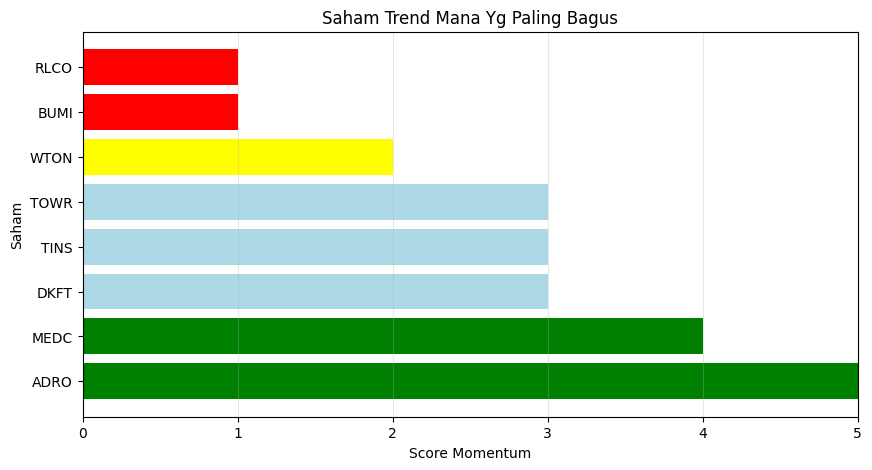

Ranking saham trend


In [7]:
warna = []
for sc in df_analisis['Score']:
    if sc >= 4:
        warna.append('green')
    elif sc == 3:
        warna.append('lightblue')
    elif sc == 2:
        warna.append('yellow')
    else:
        warna.append('red')

plt.figure(figsize=(10, 5))
plt.barh(df_analisis['Saham'], df_analisis['Score'], color=warna)
plt.xlabel('Score Momentum')
plt.ylabel('Saham')
plt.title('Saham Trend Mana Yg Paling Bagus')
plt.xlim(0, 5)
plt.grid(axis='x', alpha=0.3)
plt.show()
print("Ranking saham trend")